#### import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [387]:
Toyota_data = pd.read_csv("ToyotaCorolla.csv")
Toyota_data.head()


,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,46986,90,2000,3,5,210,1165
1,2,13750,23,72937,90,2000,3,5,210,1165
2,3,13950,24,41711,90,2000,3,5,210,1165
3,4,14950,26,48000,90,2000,3,5,210,1165
4,5,13750,30,38500,90,2000,3,5,210,1170


In [388]:
Toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1436 non-null   int64
 1   Price          1436 non-null   int64
 2   Age_08_04      1436 non-null   int64
 3   KM             1436 non-null   int64
 4   HP             1436 non-null   int64
 5   cc             1436 non-null   int64
 6   Doors          1436 non-null   int64
 7   Gears          1436 non-null   int64
 8   Quarterly_Tax  1436 non-null   int64
 9   Weight         1436 non-null   int64
dtypes: int64(10)
memory usage: 112.3 KB


In [389]:
#checking for missing values
Toyota_data.isna().sum()

Id               0
Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

# Correaltion Matrix

In [390]:
Toyota_data.corr()

,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.117704,-0.130207,-0.043343,-0.240821,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.117704,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.240821,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot B/w variables along with the Histograms

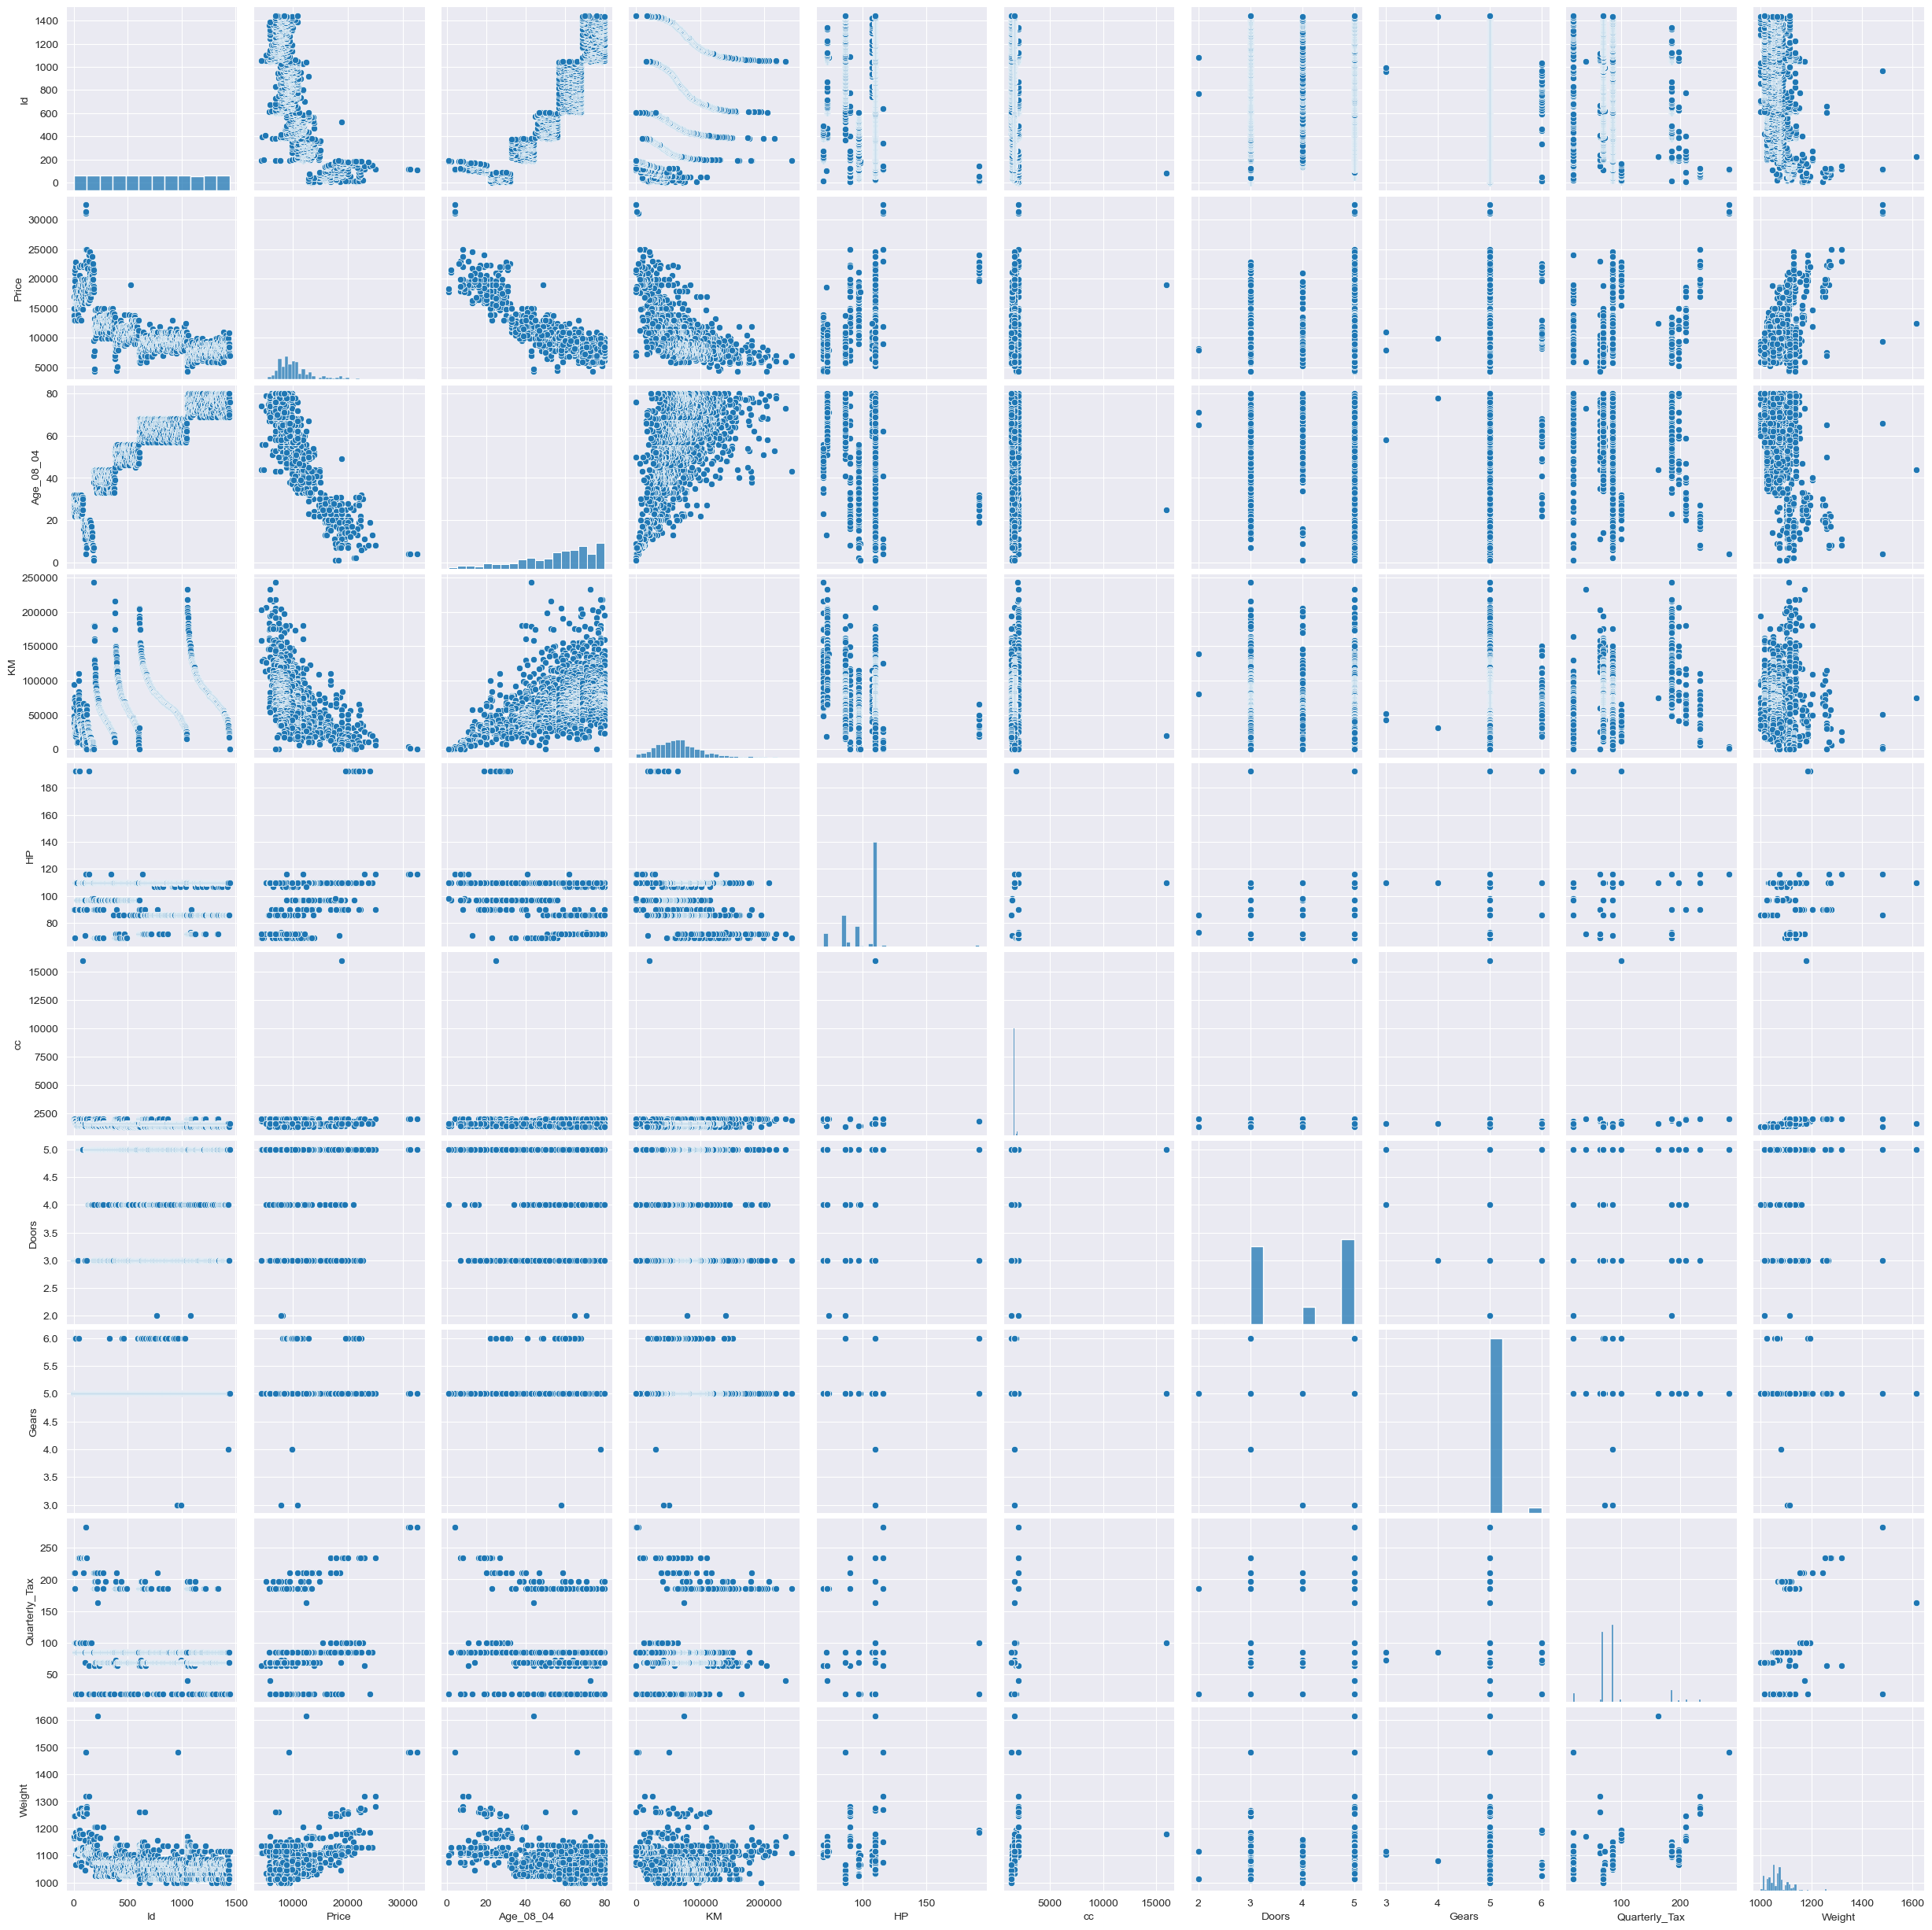

In [391]:
sns.set_style(style='darkgrid')
sns.pairplot(Toyota_data)

<Axes: >

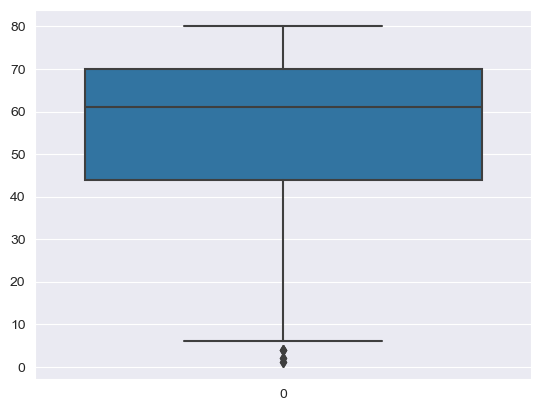

In [392]:
sns.boxplot(Toyota_data['Age_08_04'])

In [393]:
# split the variables as X and Y
Y = Toyota_data["Price"]
X = Toyota_data[['Age_08_04','KM','HP','cc','Weight']]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared Error", mse.round(2))
import numpy as np
rmse = np.sqrt(mse)
print("Root Mean squared Error", rmse.round(2))

r2 = r2_score(Y,Y_pred)
print("R2_score", r2.round(2))

Mean squared Error 1815813.09
Root Mean squared Error 1347.52
R2_score 0.86


In [394]:
#X = Toyota_data[['Age_08_04','HP','cc','Weight']]
"""Mean squared Error 2143920.28
Root Mean squared Error 1464.21
R2_score 0.84"""

#X = Toyota_data[['Age_08_04','KM','HP','cc','Weight']]
"""Mean squared Error 1815813.09
Root Mean squared Error 1347.52
R2_score 0.86"""

#X = Toyota_data[['cc','Weight']]
"""Mean squared Error 8635328.46
Root Mean squared Error 2938.59
R2_score 0.34"""

#X = Toyota_data[['KM','HP','cc','Weight']]
"""Mean squared Error 4580854.54
Root Mean squared Error 2140.29
R2_score 0.65"""


#X = Toyota_data[['Age_08_04','KM']]
"""Mean squared Error 2760910.65
Root Mean squared Error 1661.6
R2_score 0.79"""

#X = Toyota_data[['KM','HP']]
"""Mean squared Error 8644573.8
Root Mean squared Error 2940.17
R2_score 0.34"""

#X = Toyota_data[['Age_08_04']]
"""Mean squared Error 3044403.46
Root Mean squared Error 1744.82
R2_score 0.77"""

'Mean squared Error 3044403.46\nRoot Mean squared Error 1744.82\nR2_score 0.77'

# Preparing a model

In [395]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=Toyota_data).fit()

In [396]:
#coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [397]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [398]:
#R squared values
(model.rsquared,model.rsquared_adj)  # r^2 is Accuraccy of a model and adj_r^2 is if it is increases then variabe is irrilavent

(0.8637627463428192, 0.8629989775766963)

# Simple Linear Regresions Models to check series of variables 

In [401]:
ml_1=smf.ols("Price~Age_08_04",data=Toyota_data).fit()
print(ml_1.tvalues, '\n', ml_1.pvalues)
(ml_1.rsquared,ml_1.rsquared_adj)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


(0.7684108996825327, 0.7682494010072765)

In [402]:
ml_1=smf.ols("Price~KM",data=Toyota_data).fit()
print(ml_1.tvalues, '\n', ml_1.pvalues)
(model.rsquared,model.rsquared_adj)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


(0.8637627463428192, 0.8629989775766963)

In [403]:
ml_2=smf.ols("Price~HP",data=Toyota_data).fit()
print(ml_2.tvalues, '\n', ml_2.pvalues)
(ml_2.rsquared,ml_2.rsquared_adj)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


(0.09921859277665834, 0.09859043279951518)

In [404]:
ml_3=smf.ols("Price~cc",data=Toyota_data).fit()
print(ml_3.tvalues, '\n', ml_3.pvalues)
(ml_3.rsquared,ml_3.rsquared_adj)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


(0.01597422921332259, 0.015288018773443546)

In [405]:
ml_4=smf.ols("Price~Doors",data=Toyota_data).fit()
print(ml_4.tvalues, '\n', ml_4.pvalues)
(ml_4.rsquared,ml_4.rsquared_adj)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


(0.03434555943109807, 0.03367216023962749)

In [406]:
ml_5=smf.ols("Price~Gears",data=Toyota_data).fit()
print(ml_5.tvalues, '\n', ml_5.pvalues)
(ml_5.rsquared,ml_5.rsquared_adj)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


(0.003982096785360323, 0.0032875236310964118)

In [407]:
ml_6=smf.ols("Price~Quarterly_Tax",data=Toyota_data).fit()
print(ml_6.tvalues, '\n', ml_6.pvalues)
(ml_6.rsquared,ml_6.rsquared_adj)

Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


(0.048047285674065465, 0.04738344138234596)

In [408]:
ml_7=smf.ols("Price~Weight",data=Toyota_data).fit()
print(ml_7.tvalues, '\n', ml_7.pvalues)
(ml_7.rsquared,ml_7.rsquared_adj)

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


(0.33779063704356427, 0.33732884529812746)

In [409]:
ml_8=smf.ols("Price~Age_08_04+KM+HP+cc+Weight",data=Toyota_data).fit()
print(ml_8.tvalues, '\n', ml_8.pvalues)
(ml_8.rsquared,ml_8.rsquared_adj)

Intercept    -4.388629
Age_08_04   -46.664140
KM          -16.074606
HP           11.930907
cc           -0.988770
Weight       22.372752
dtype: float64 
 Intercept     1.224415e-05
Age_08_04    1.238049e-289
KM            1.418483e-53
HP            2.377142e-31
cc            3.229430e-01
Weight        2.638577e-95
dtype: float64


(0.861870305617451, 0.8613873346580715)

# Calculating VIF

In [410]:
import statsmodels.formula.api as smf

model1 = smf.ols('KM ~Age_08_04+HP+Doors+Quarterly_Tax+Gears+cc+Weight',data=Toyota_data).fit()
model1.rsquared

0.4308171891807999

In [411]:
model1_Vif = 1/(1-(model1.rsquared))
model1_Vif

1.7569047782042881

In [412]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     KM   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          8.97e-170
Time:                        23:47:35   Log-Likelihood:                -16757.
No. Observations:                1436   AIC:                         3.353e+04
Df Residuals:                    1428   BIC:                         3.357e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.789e+04   2.98e+04     -2.618      0.009   -1.36e+05   -1.95e+04
Age_08_04      1140.0977     46.306     24.621      0.000    1049.263    1230.932
HP             -449.5668     58.349     -7.705      0.000    -564.026    -335.107
Doors           947.6637    844.925      1.122      0.262    -709.763    2605.090
Quarterly_Tax   263.2550     26.789      9.827      0.000     210.705     315.805
Gears           1.18e+04   4151.937      2.843      0.005    3659.869    1.99e+04
cc                5.1437      1.899      2.709      0.007       1.419       8.868
Weight           31.7609     22.549      1.409      0.159     -12.472      75.994
==============================================================================
Omnibus:                      174.970   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.214
Skew:                           0.770   Prob(JB):                     3.25e-72
Kurtosis:                       4.770   Cond. No.                     7.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [413]:
model2 = smf.ols('Age_08_04~KM+HP+Doors+Quarterly_Tax+Gears+cc+Weight',data=Toyota_data).fit()

model2.rsquared

0.4693889998414592

In [414]:
model3 = smf.ols('HP ~Age_08_04+KM+Doors+Quarterly_Tax+cc+Weight',data=Toyota_data).fit()
model4 = smf.ols('Doors ~Age_08_04+HP+Quarterly_Tax+Gears+Doors+cc+Weight',data=Toyota_data).fit()
model5 = smf.ols('Gears ~Age_08_04+HP+Quarterly_Tax+Doors+cc+Weight',data=Toyota_data).fit()
model6 = smf.ols('Weight ~Age_08_04+HP+Quarterly_Tax+Doors+Gears+cc+Weight',data=Toyota_data).fit()
model7 = smf.ols('cc ~Age_08_04+HP+Quarterly_Tax+Doors+Gears+cc+Weight',data=Toyota_data).fit()
model8 = smf.ols('Quarterly_Tax ~Age_08_04+HP+Gears+Doors+cc+Weight',data=Toyota_data).fit()


# Residual analysis

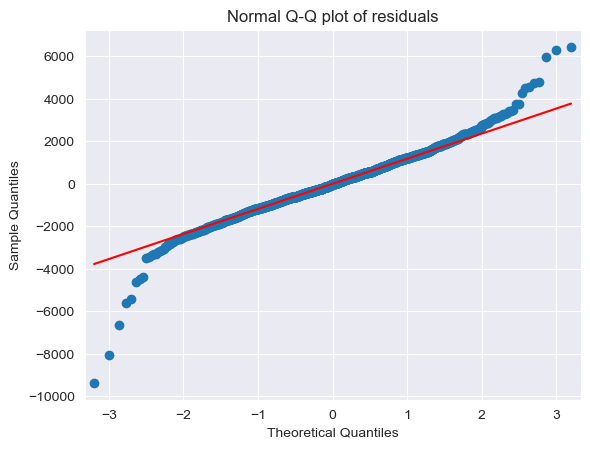

In [415]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') #line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [416]:
list(np.where(model.resid>4000)) #it show the which are the outliers by the graphs > 

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [417]:
#Residual plot for homoscedasticity it mean the data points are in non-linear
def get_standardized_values( vals ):
    return(vals - vals.mean())/vals.std()   #we are going to normalize the error by useing z-score

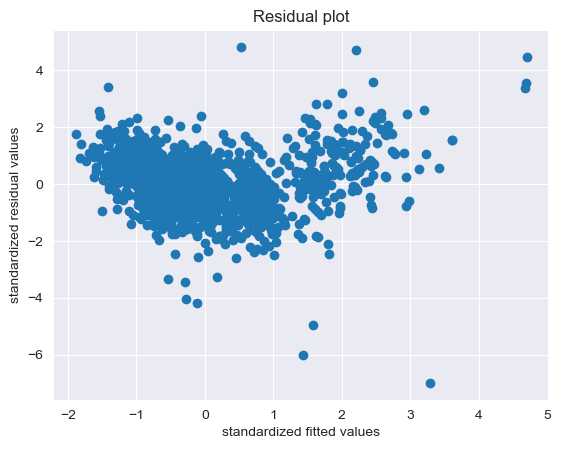

In [418]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()


# cook's distance

In [421]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

NameError: name 'Toyota_data' is not defined

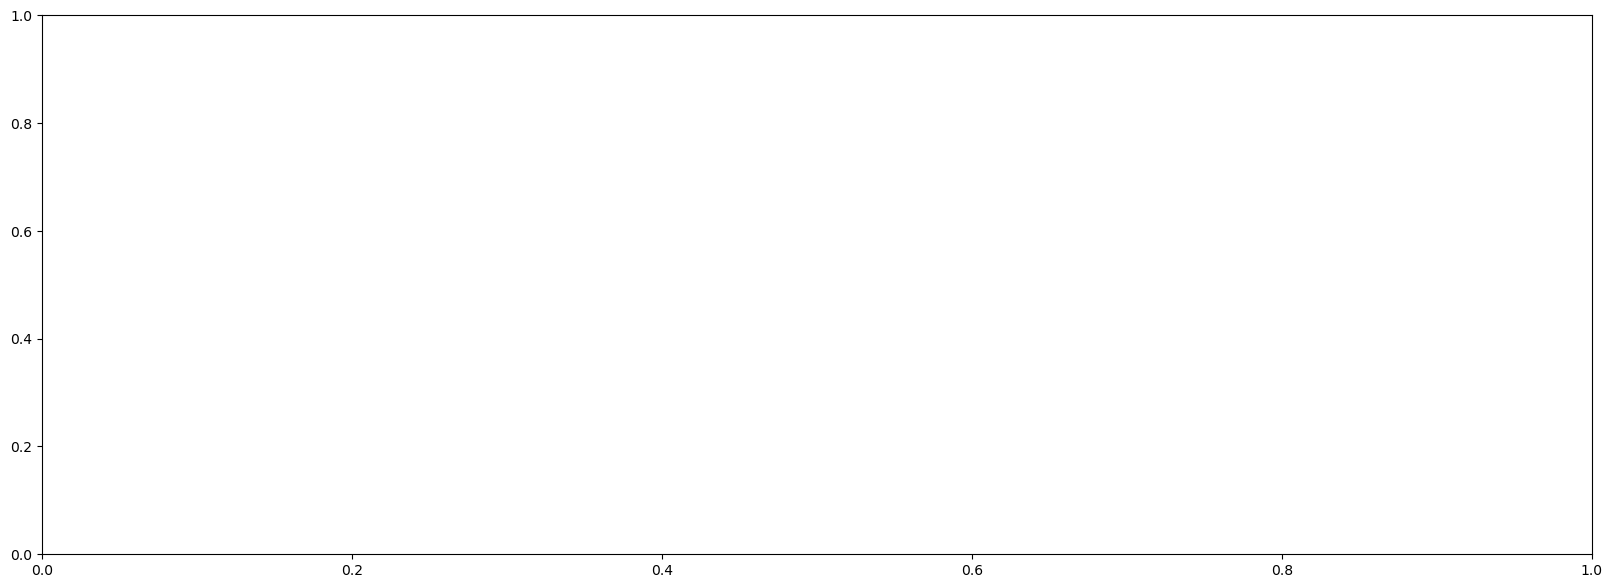

In [4]:
#plot the influcence values using stem plot
import matplotlib.pyplot as plt
import numpy as np
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyota_data)),np.round(c, 2)) #c is cooks distance
plt.xlabel("Row index")
plt.ylabel("cooks Distance")
plt.show()   # so the points which are far from the cook's distance that has to remove because it could be outlers or influence data point

In [423]:
#let find highest cooks distance value and index data point
#np.index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))  # output which is got that data point has to remove


(80, 79.52010624137341)

# High Influence point

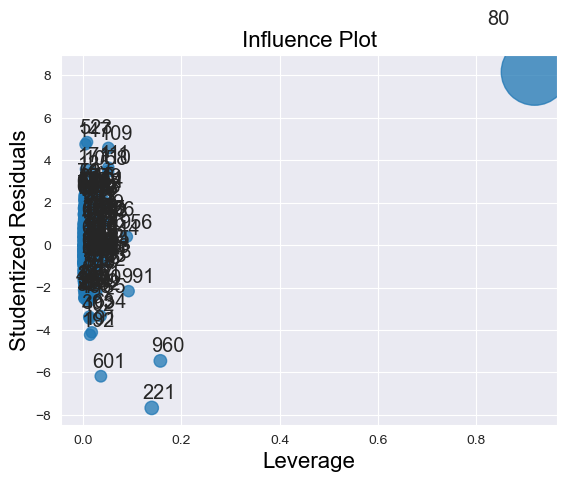

In [424]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show() 
# the points show based on the size of the data point so like high hat value that influence the regresion line 
#so 80 came out as influence data point as shown above in the cell

In [425]:
k = Toyota_data.shape[1]  # k is no.of columns
n = Toyota_data.shape[0]  # n is number of data points in it
leverage_cutoff = 3*((k + 1)/n)

In [426]:
leverage_cutoff # so 0.02 means as in plot there is only one which is 80

0.02298050139275766

# From above plot, it is evident that data point 80 is influencers 

In [430]:
Toyota_data[Toyota_data.index.isin([922,956,991,80])] #this record should be pulled

,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,81,18950,25,20019,110,16000,5,5,100,1180
922,926,9950,63,57000,110,1600,3,5,69,1050
956,960,10950,58,51421,110,1600,5,3,85,1105
991,996,7950,58,43000,110,1600,4,3,72,1114


In [428]:
Toyota_data.head(10)

,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,46986,90,2000,3,5,210,1165
1,2,13750,23,72937,90,2000,3,5,210,1165
2,3,13950,24,41711,90,2000,3,5,210,1165
3,4,14950,26,48000,90,2000,3,5,210,1165
4,5,13750,30,38500,90,2000,3,5,210,1170
5,6,12950,32,61000,90,2000,3,5,210,1170
6,7,16900,27,94612,90,2000,3,5,210,1245
7,8,18600,30,75889,90,2000,3,5,210,1245
8,9,21500,27,19700,192,1800,3,5,100,1185
9,10,12950,23,71138,69,1900,3,5,185,1105


# improving the model

In [431]:
#load the data
Toyota_new = pd.read_csv(r"C:\Users\SHIVA KUMAR\Desktop\Assigmnt\ToyotaCorolla.csv")


In [432]:
#Discard the data points which are influences and reassign the row number (reset_index())
car1=Toyota_new.drop(Toyota_new.index[[80]],axis=0).reset_index()

In [433]:
#drop the original index
car1=car1.drop(['index'],axis=1)


In [434]:
car1

,Id,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,46986,90,2000,3,5,210,1165
1,2,13750,23,72937,90,2000,3,5,210,1165
2,3,13950,24,41711,90,2000,3,5,210,1165
3,4,14950,26,48000,90,2000,3,5,210,1165
4,5,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1438,7500,69,20544,86,1300,3,5,69,1025
1431,1439,10845,72,19000,86,1300,3,5,69,1015
1432,1440,8500,71,17016,86,1300,3,5,69,1015
1433,1441,7250,70,16916,86,1300,3,5,69,1015


# build Model

In [435]:
#excluding variable "Doors	Gears	Quarterly_Tax" and gernarate R-squared and AIC values
final_ml_v = smf.ols("Price ~Age_08_04+KM+HP+cc+Weight",data=car1).fit()

In [436]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8645947090820577, 24732.90200636056)

# Predicting for new data

In [438]:
New_data = pd.DataFrame({'Age_08_04':34,'KM':1298,'HP':66,'cc':1400,'Weight':1022},index=[1])

In [439]:
New_data

,Age_08_04,KM,HP,cc,Weight
1,34,1298,66,1400,1022


In [440]:
final_ml_v.predict(New_data)

1    12532.480174
dtype: float64